This assignment is collaborated by **Jingting Dai** and **Hongjie Guan**. **Hongjie finished A03.1 and Jingting finished A03.2,03.3.** 

# A03.1 Centrality correlations
Task: Learn about centrality measures and how they
correlate in different networks

For the given networks compute:
+ the degree 𝑘𝑖
, closeness 𝑐𝑖
, betweenness 𝑏𝑖 and eigenvector 𝑒𝑖
centrality for each node;
+ then do a scatter plot for each pair of centralities (6 plots total);
+ compute Pearson’s, Spearman’s and Kendall’s correlation
coefficients for each pair and note them on the scatter plots;
+ briefly explain, for the Jazz collaborations data, what each of
the centrality measures means in practice.

In [1]:
import networkx as nx
import scipy.stats as sp
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib

In [2]:
matplotlib.rcParams['figure.figsize'] = (12, 6)

In [3]:
def import_datasets(datasets_folder):
    d={} #empty dictionary
    for item in os.listdir(datasets_folder):
        if 'gml'in item and 'random' not in item:
            item_path = os.path.join(datasets_folder,item)
            item_name = item.split("_",1)[1].split(".")[0] 
            print("dataset named "+item_name+" imported")
            d["{}".format(item_name)] = nx.read_gml(item_path)
    print("finish importing")
    return d

In [4]:
graphs = import_datasets('data-assignment3')

dataset named jazz_collab imported
dataset named terrorists imported
dataset named polblog imported
finish importing


In [5]:
graphs

{'jazz_collab': <networkx.classes.graph.Graph at 0x13359a770>,
 'terrorists': <networkx.classes.graph.Graph at 0x133598f40>,
 'polblog': <networkx.classes.graph.Graph at 0x133599150>}

### First we compute the degree $𝑘_𝑖$, closeness $𝑐_𝑖$, betweenness $𝑏_𝑖$ and eigenvector $𝑒_𝑖$ centrality for each node

In [6]:
degree = {}
for name, graph in graphs.items():
    d = nx.degree_centrality(graph)
    degree[name]=d

In [7]:
closeness = {}
for name, graph in graphs.items():
    c = nx.closeness_centrality(graph)
    closeness[name]=c

In [8]:
betweenness = {}
for name, graph in graphs.items():
    b = nx.betweenness_centrality(graph)
    betweenness[name]=b

In [9]:
eigenvector = {}
for name, graph in graphs.items():
    e = nx.eigenvector_centrality(graph)
    eigenvector[name]=e

In [10]:
degree['terrorists'].values()

dict_values([0.01639344262295082, 0.18032786885245902, 0.01639344262295082, 0.01639344262295082, 0.03278688524590164, 0.06557377049180328, 0.03278688524590164, 0.04918032786885246, 0.03278688524590164, 0.09836065573770492, 0.04918032786885246, 0.36065573770491804, 0.0819672131147541, 0.06557377049180328, 0.03278688524590164, 0.11475409836065574, 0.04918032786885246, 0.13114754098360656, 0.04918032786885246, 0.01639344262295082, 0.01639344262295082, 0.01639344262295082, 0.06557377049180328, 0.03278688524590164, 0.1639344262295082, 0.03278688524590164, 0.0819672131147541, 0.06557377049180328, 0.0819672131147541, 0.13114754098360656, 0.14754098360655737, 0.29508196721311475, 0.01639344262295082, 0.01639344262295082, 0.06557377049180328, 0.13114754098360656, 0.09836065573770492, 0.06557377049180328, 0.09836065573770492, 0.13114754098360656, 0.14754098360655737, 0.0819672131147541, 0.06557377049180328, 0.21311475409836067, 0.18032786885245902, 0.03278688524590164, 0.01639344262295082, 0.131

In [11]:
import numpy as np
len(np.asarray(list(degree['terrorists'].values())))

62

### Then we do a scatter plot for each pair of centralities (6 plots for each of the graphs)  and compute Pearson’s, Spearman’s and Kendall’s correlation coefficients for each pair.

In [12]:
def plot_Centralities_A_with_B_of_graph_G(A_cens,B_cens,stringA,stringB,g):
    x=list(A_cens[g].values())
    y=list(B_cens[g].values())
    plt.scatter(x,y)
    plt.xticks(np.arange(0, max(x), 0.1))
    plt.yticks(np.arange(0, max(y), 0.1))
    plt.xlabel(stringA+' centrality')
    plt.ylabel(stringB+' centrality')
    plt.title(g + ': '+ stringB+' centrality vs ' + stringA+' centrality') #add plot title
    plt.show()
    pearson = sp.pearsonr(x,y)[0]
    print(f"Pearson's correlation: {pearson}")
    kendall = sp.kendalltau(x,y)[0]
    print(f"Kendall's tau: {kendall}")
    spearman = sp.spearmanr(x,y)[0]
    print(f"Spearman's rho: {spearman}")

#### 1) jazz_collab

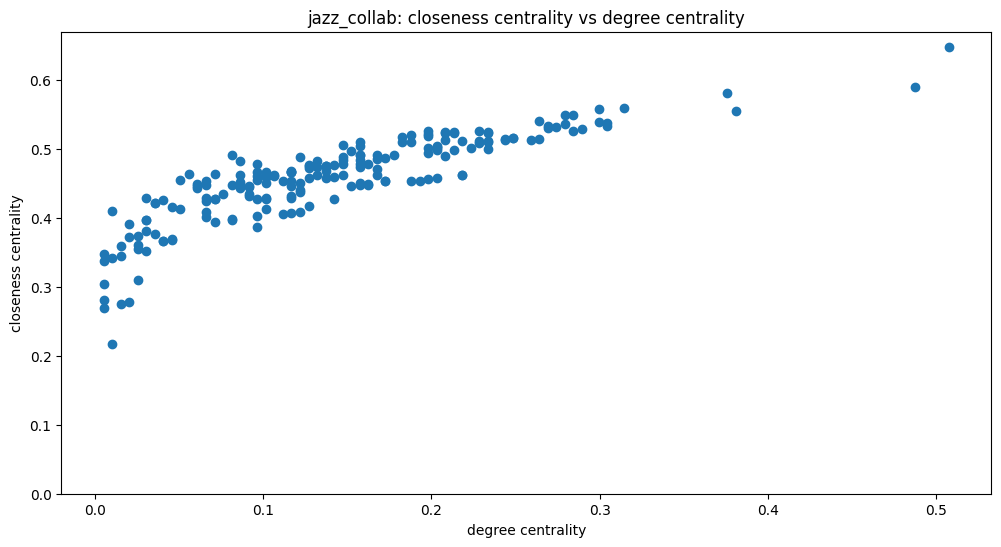

Pearson's correlation: 0.8587106972182647
Kendall's tau: 0.735952618073043
Spearman's rho: 0.8899758183086891


In [13]:
plot_Centralities_A_with_B_of_graph_G(degree,closeness,'degree','closeness','jazz_collab')

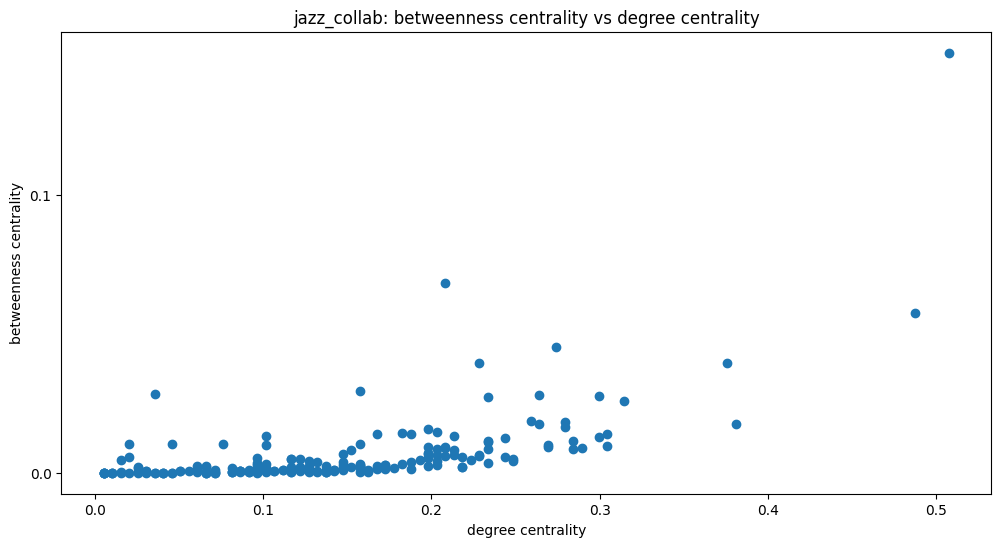

Pearson's correlation: 0.6051349791324678
Kendall's tau: 0.5787072584461878
Spearman's rho: 0.7425814037045885


In [14]:
plot_Centralities_A_with_B_of_graph_G(degree,betweenness,'degree','betweenness','jazz_collab')

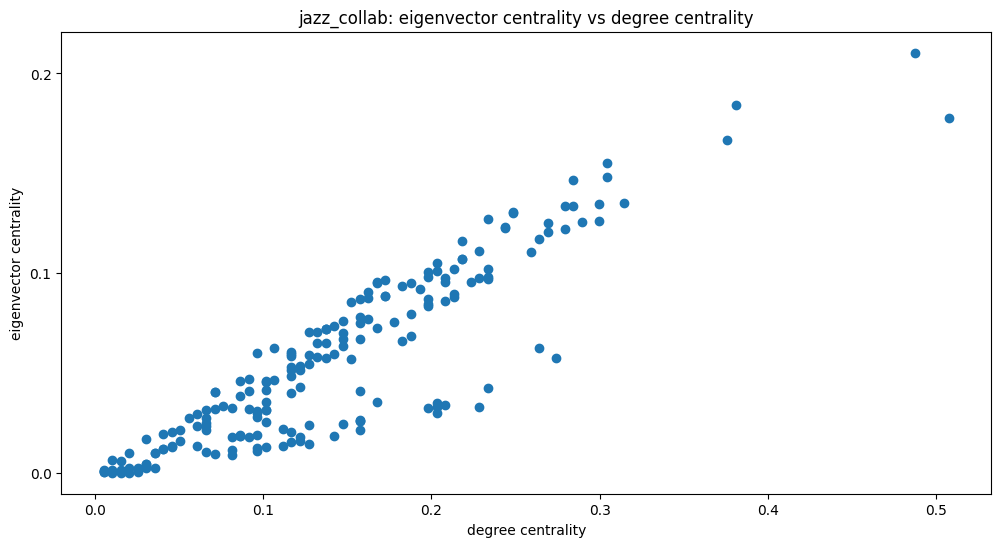

Pearson's correlation: 0.9009969374426161
Kendall's tau: 0.7502856369607785
Spearman's rho: 0.8898117929232551


In [15]:
plot_Centralities_A_with_B_of_graph_G(degree,eigenvector,'degree','eigenvector','jazz_collab')

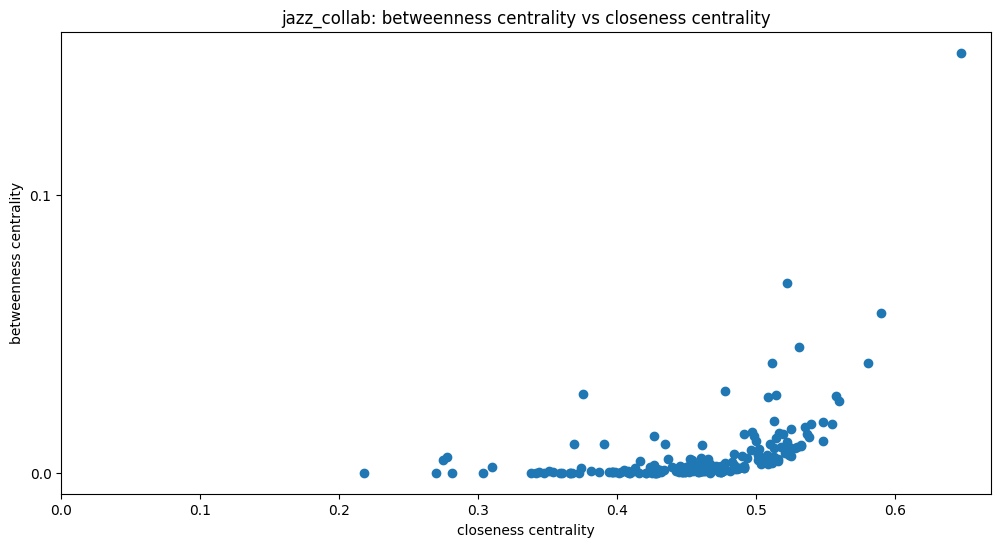

Pearson's correlation: 0.47453331814710237
Kendall's tau: 0.565570608829298
Spearman's rho: 0.7296349465164756


In [16]:
plot_Centralities_A_with_B_of_graph_G(closeness,betweenness,'closeness','betweenness','jazz_collab')

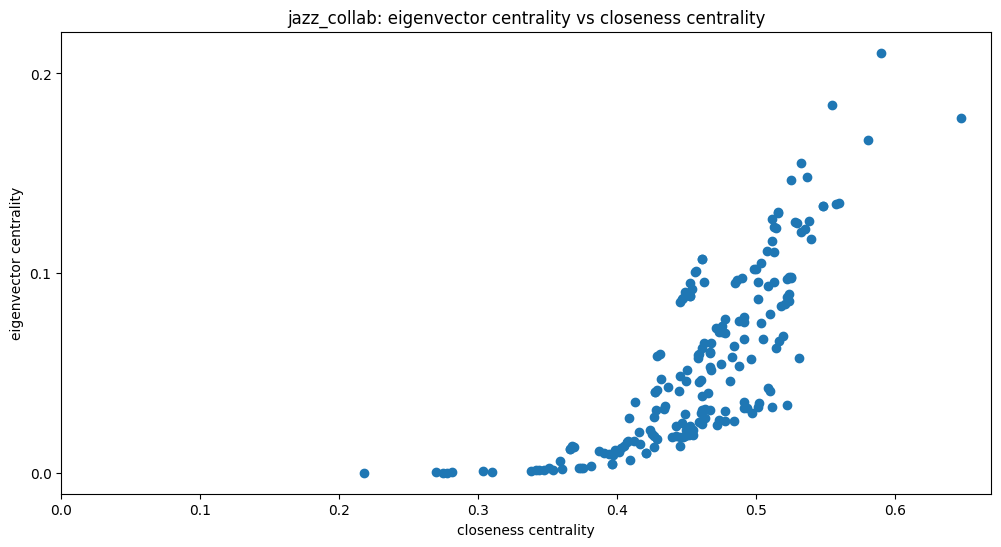

Pearson's correlation: 0.7836833939294421
Kendall's tau: 0.681690071202119
Spearman's rho: 0.8396874476211065


In [17]:
plot_Centralities_A_with_B_of_graph_G(closeness,eigenvector,'closeness','eigenvector','jazz_collab')

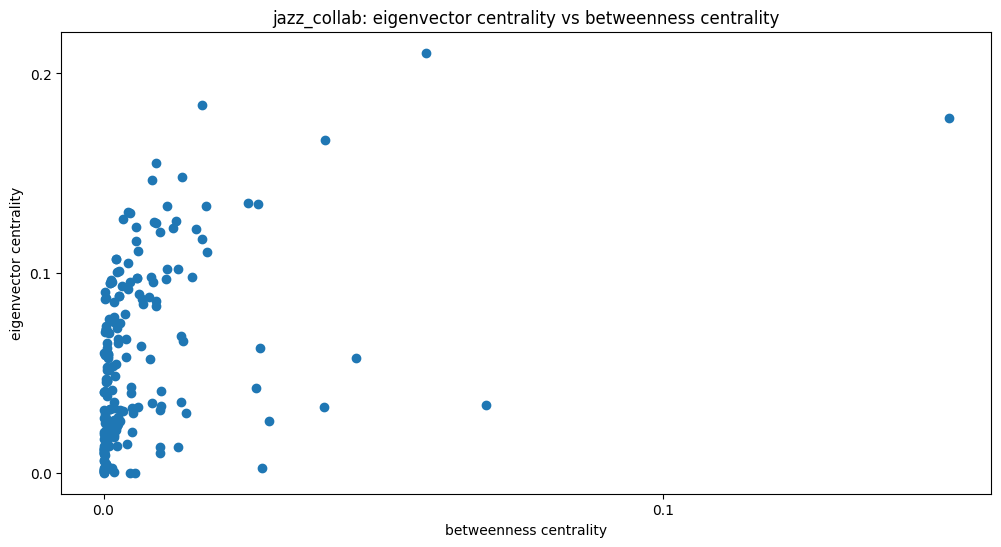

Pearson's correlation: 0.39739820914134144
Kendall's tau: 0.4165417503990736
Spearman's rho: 0.5668170831713112


In [18]:
plot_Centralities_A_with_B_of_graph_G(betweenness,eigenvector,'betweenness','eigenvector','jazz_collab')

#### 2) polblog

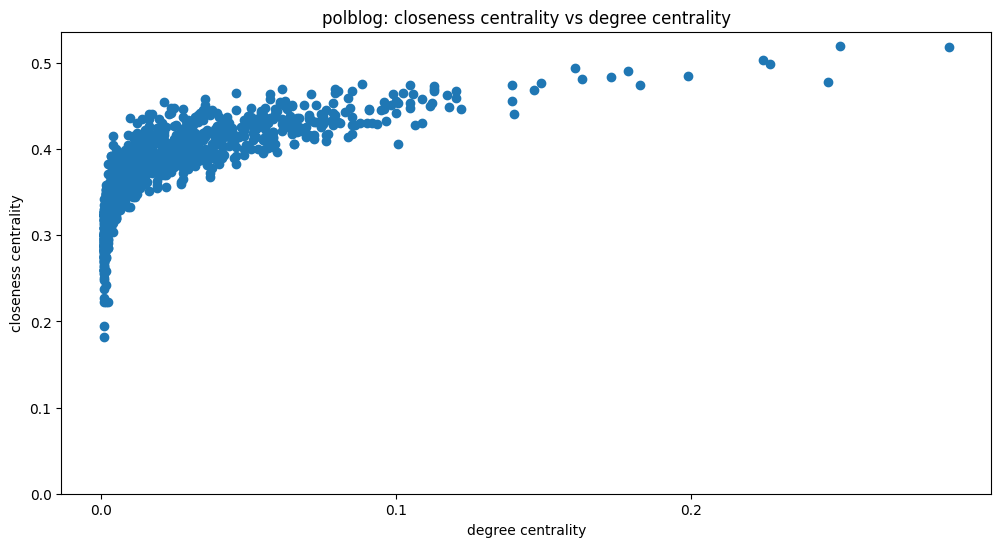

Pearson's correlation: 0.7231572938687207
Kendall's tau: 0.7667639730160004
Spearman's rho: 0.9235824237834013


In [19]:
plot_Centralities_A_with_B_of_graph_G(degree,closeness,'degree','closeness','polblog')

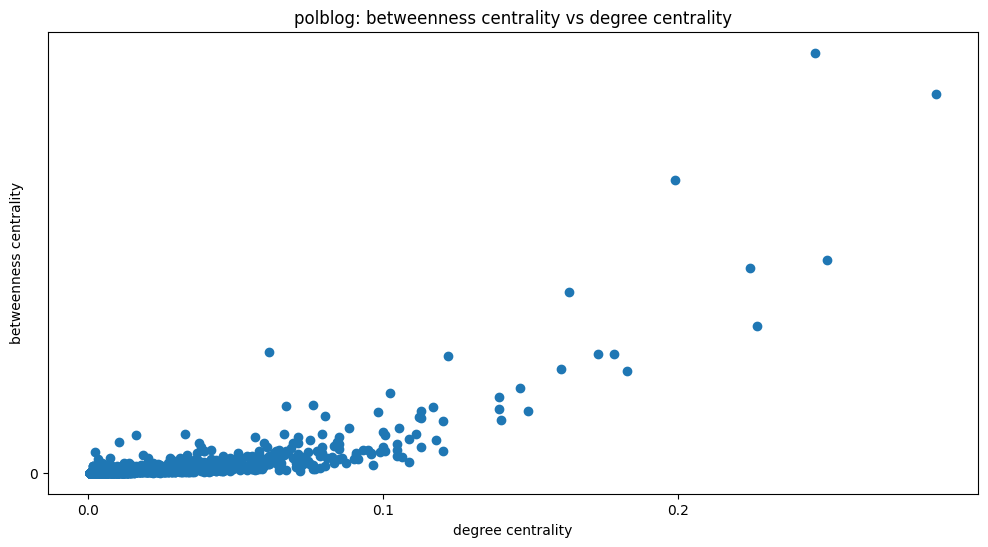

Pearson's correlation: 0.7506490423033712
Kendall's tau: 0.7650728276270042
Spearman's rho: 0.9074662557288967


In [20]:
plot_Centralities_A_with_B_of_graph_G(degree,betweenness,'degree','betweenness','polblog')

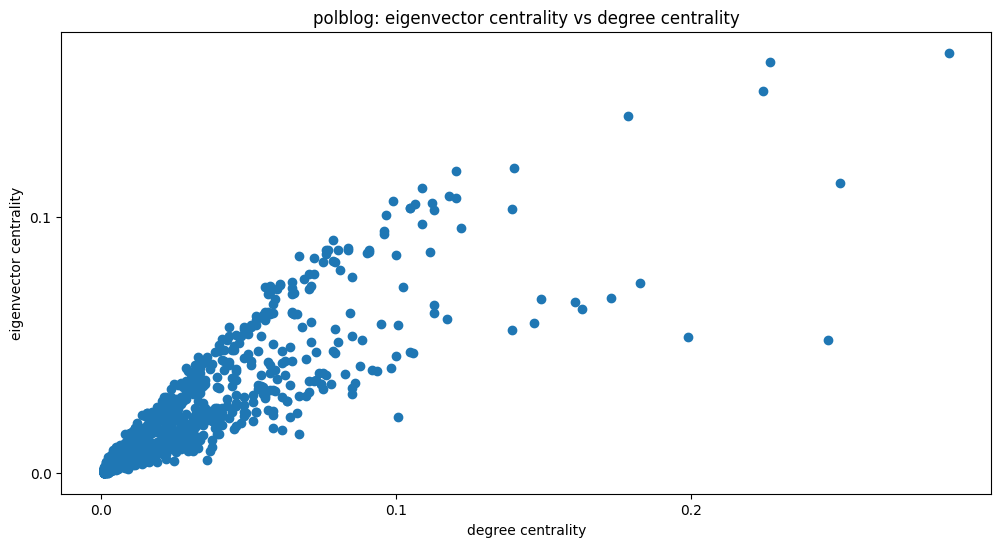

Pearson's correlation: 0.8839868880099114
Kendall's tau: 0.8141941352508475
Spearman's rho: 0.9518430233171467


In [21]:
plot_Centralities_A_with_B_of_graph_G(degree,eigenvector,'degree','eigenvector','polblog')

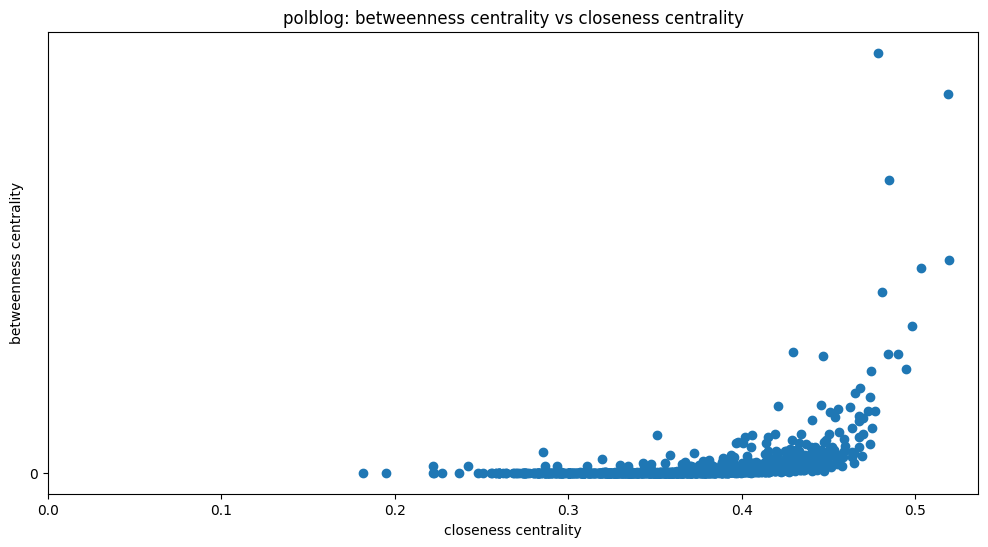

Pearson's correlation: 0.39145107829724773
Kendall's tau: 0.6909056080911741
Spearman's rho: 0.8595291353276445


In [22]:
plot_Centralities_A_with_B_of_graph_G(closeness,betweenness,'closeness','betweenness','polblog')

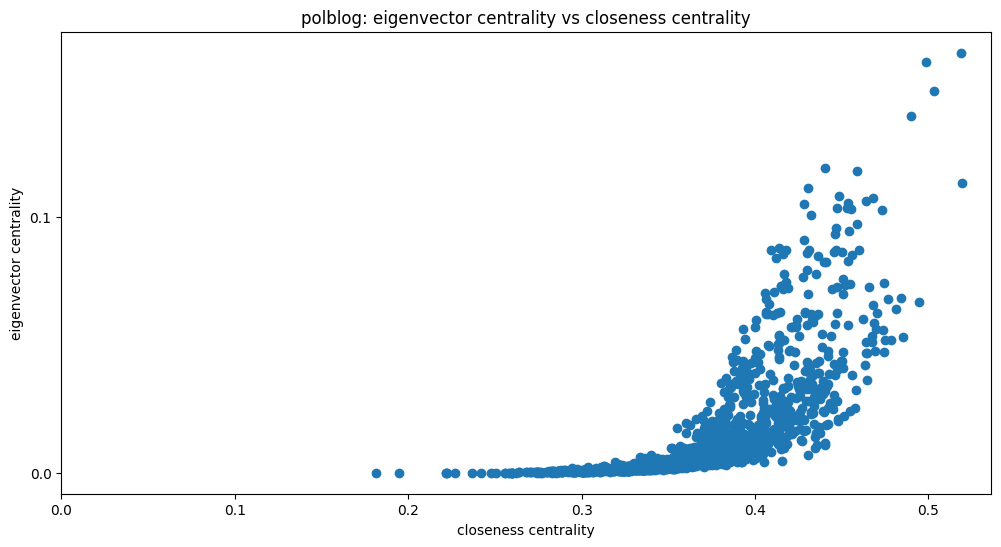

Pearson's correlation: 0.7027942099795027
Kendall's tau: 0.7552717069180305
Spearman's rho: 0.9199400509762883


In [23]:
plot_Centralities_A_with_B_of_graph_G(closeness,eigenvector,'closeness','eigenvector','polblog')

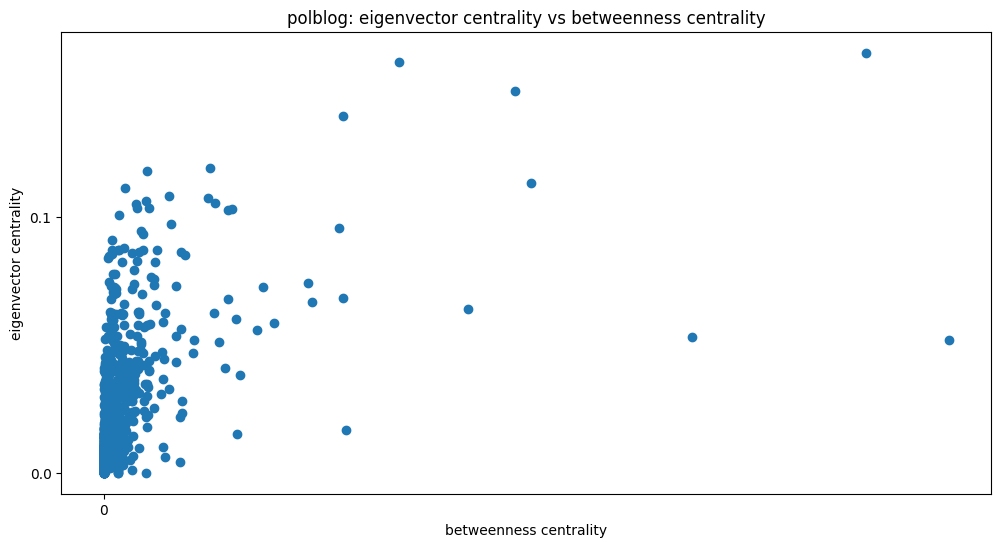

Pearson's correlation: 0.5053636953323734
Kendall's tau: 0.6565591310732064
Spearman's rho: 0.8359068917351269


In [24]:
plot_Centralities_A_with_B_of_graph_G(betweenness,eigenvector,'betweenness','eigenvector','polblog')

#### 3) terrorists

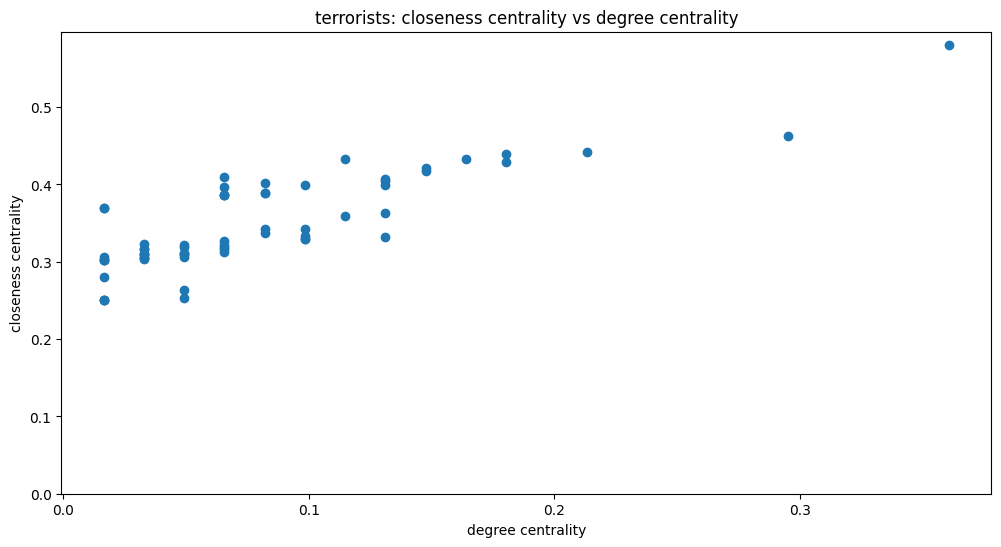

Pearson's correlation: 0.8373140120704982
Kendall's tau: 0.7013857454691395
Spearman's rho: 0.830732183391181


In [25]:
plot_Centralities_A_with_B_of_graph_G(degree,closeness,'degree','closeness','terrorists')

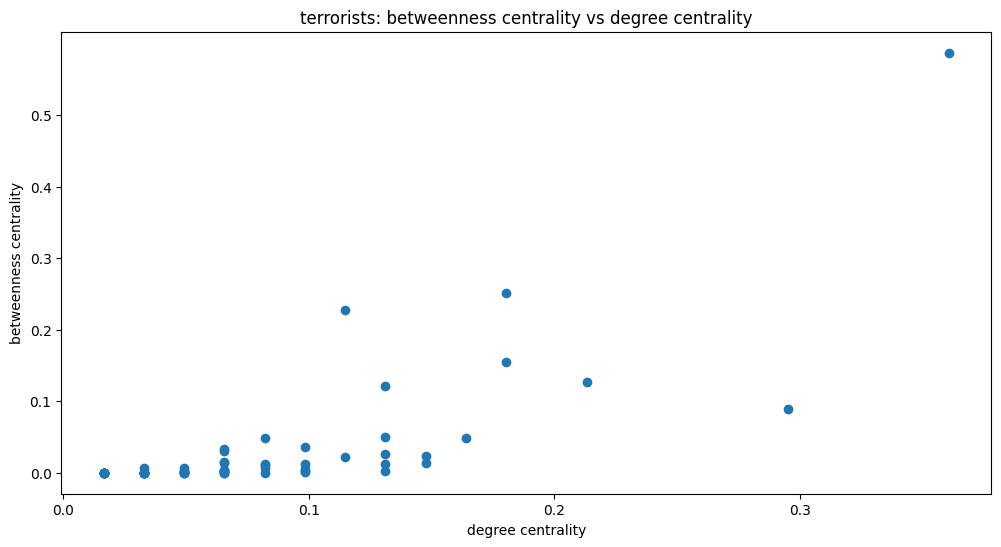

Pearson's correlation: 0.75077361708502
Kendall's tau: 0.6965515610208622
Spearman's rho: 0.8385154596500505


In [26]:
plot_Centralities_A_with_B_of_graph_G(degree,betweenness,'degree','betweenness','terrorists')

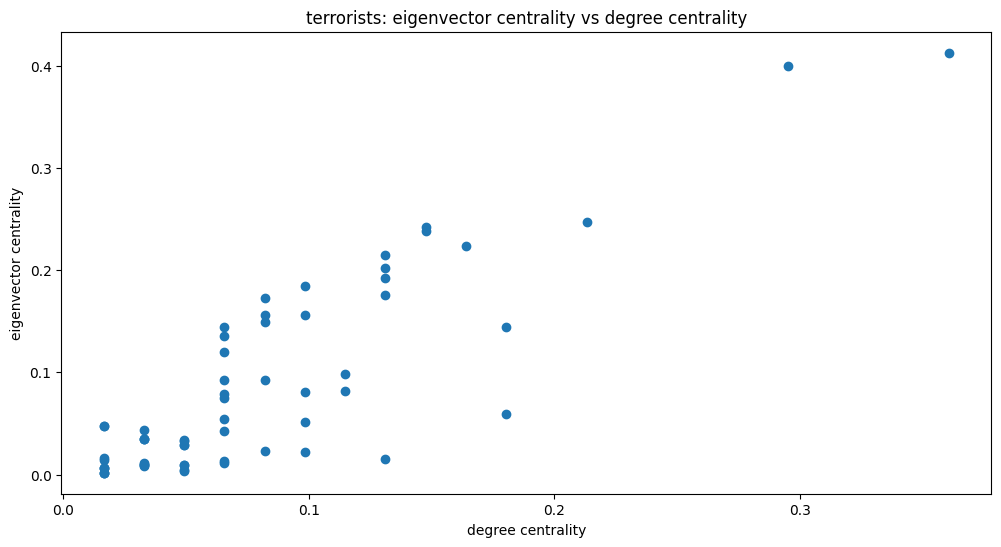

Pearson's correlation: 0.8569050642191781
Kendall's tau: 0.630057095271975
Spearman's rho: 0.7909065405054472


In [27]:
plot_Centralities_A_with_B_of_graph_G(degree,eigenvector,'degree','eigenvector','terrorists')

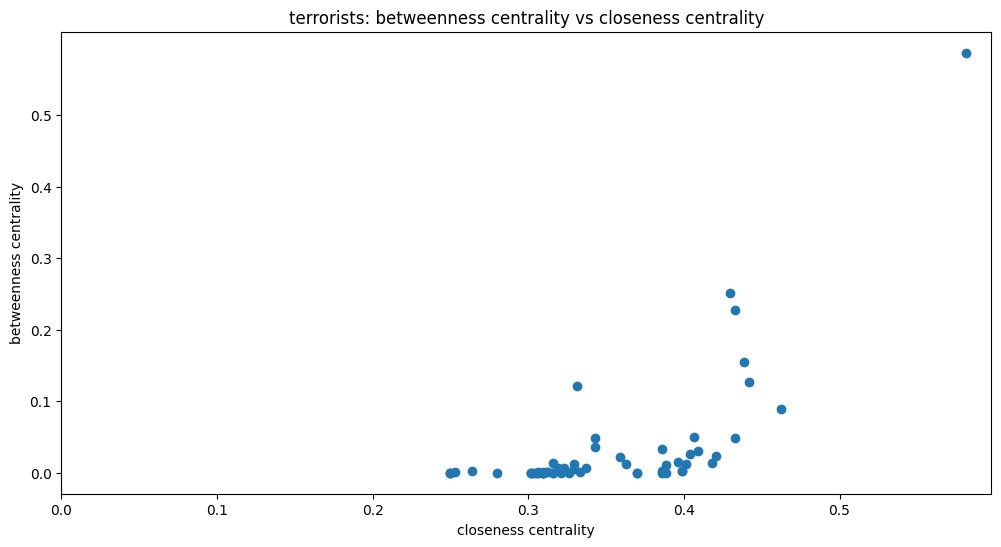

Pearson's correlation: 0.680095825217133
Kendall's tau: 0.5907758316227861
Spearman's rho: 0.7463655135604728


In [28]:
plot_Centralities_A_with_B_of_graph_G(closeness,betweenness,'closeness','betweenness','terrorists')

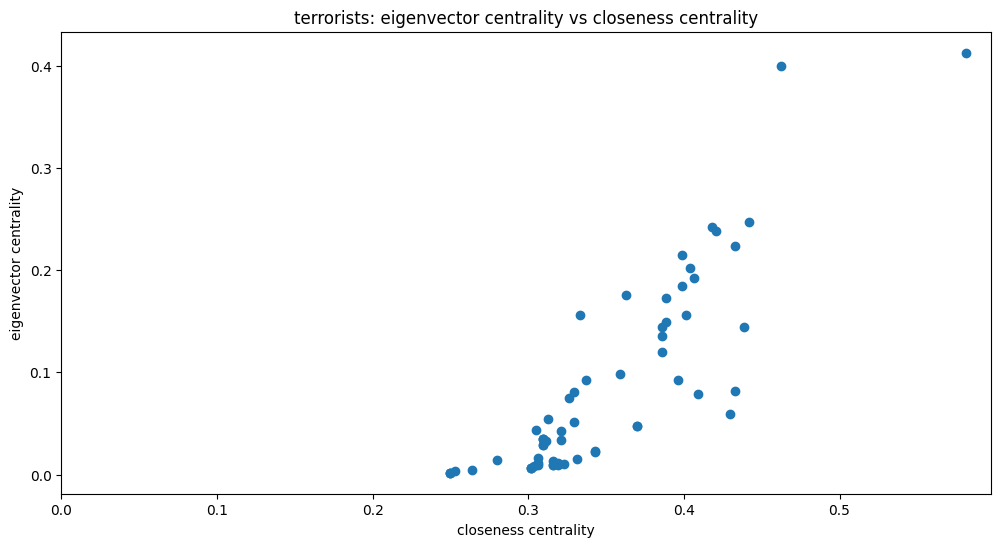

Pearson's correlation: 0.8585535503034173
Kendall's tau: 0.7210620510878796
Spearman's rho: 0.8802954460285215


In [29]:
plot_Centralities_A_with_B_of_graph_G(closeness,eigenvector,'closeness','eigenvector','terrorists')

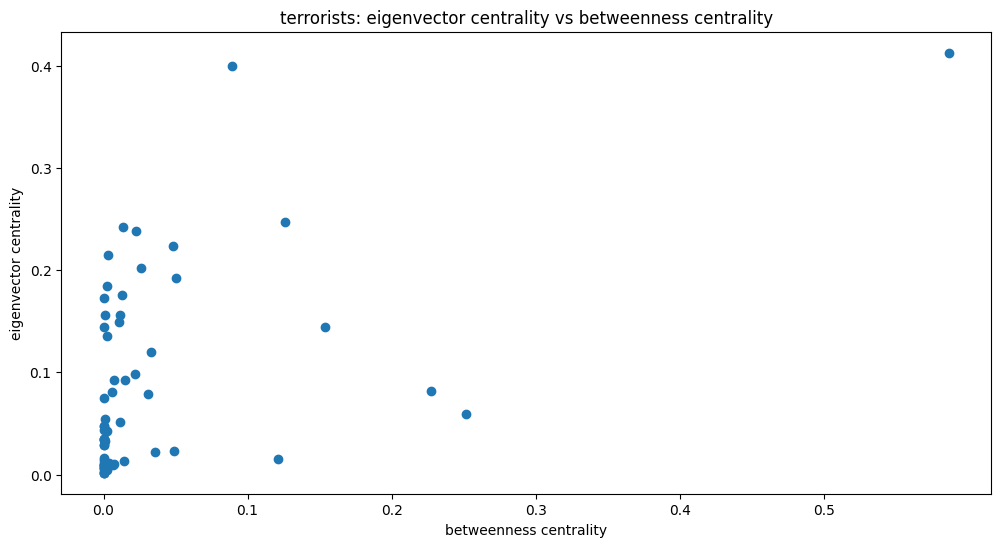

Pearson's correlation: 0.4937392972802439
Kendall's tau: 0.4104369474731793
Spearman's rho: 0.5556260266180424


In [30]:
plot_Centralities_A_with_B_of_graph_G(betweenness,eigenvector,'betweenness','eigenvector','terrorists')

#### Here we take the Jazz collaborations data as a example to elaborate what each of the centrality measures means in practice:


In this dataset, each vertex of the graph is a jazz musician and each edge represents a collaboration between these two musician(such as they have been in the same band).

+ **Degree centrality**: 
Degree centrality $k_i$ is the number of collaboration a jazz musician have with other musician. This is a local property because $k_i$ is independent of whether the neighbors of $i$ have high $k$ or not. This centrality doesn't tell anything about whether is vertex is important to the whole graph and where is the vertex(center or outside). For example, even if a jazz musician only works and keeps working with many musiciana new to the jazz community and these musicians left the community right after collaborating with him (these musician will have $k=1$), he still has a high $k$ degree centrality, which however, does not implyes that he is a important musician in the community.Degree centrality can also be normalized by the maximum degree to be a 0-1 number $CK_i$

+ **Closeness centrality**: Closeness centrality of a node i is the number of all other nodes devided by the sum of the distance of i to these nodes. It measures how fast or how short the distance can be, to reach the whole graph from this node. In this case, it measures how "central" a musician is in the community. He has the shorest "collaboration distance" to all of the other nodes.

+ **Betweeness centrality**: Betweenness centrality of node i is the sum of all proportions of path from j to k that go through i, where j and k are all other nodes in the graph. Here it measures how important a node is in a sence of "bottle neck" in the muscian collaboration relationships. For example in the dataset, most of the musician are from New York(NY) and Chicago(Chi) and there is a high tendency for musicians to collaborate with other musician from the same city. Then a musician works with both musicians from NY and Chi would have high Betweeness centrality value.

+ **Eigenvector centrality**: Eigenvector centrality means how important a node is regarding how important its neighbors are and how many neighbor it has. In this example, a musician will have high Eigenvector centrality value if he or she has higher neighbors with high Eigenvector centrality or more neighbors. In other word, each node's Eignevector centrality value is contributed by Eignevector centrality valuees of its neighbors.

# A03.2 Centrality and randomisation
Task: Explore the effect of rewiring randomisation on
centrality metrics.

+ For each dataset 𝒢, randomise it to obtain a network $𝒢_{𝑟𝑛𝑑}$
(same procedure as previous assignments).

In [31]:
#randomise function
#input must be imported gml dictionary
def randomise(networks):
    d={}
    for i in networks:
        d["grnd_{0}".format(i)] = nx.algorithms.smallworld.random_reference(
            networks[i],niter = 20, connectivity=False)
    return d

In [32]:
#randomised datasets dictionary
rnd_gs = randomise(graphs)

+ Do a scatter plot of each centrality before vs. after
randomisation (e.g.$𝑘^{𝑟𝑛𝑑}_𝑖$
vs $𝑘_𝑖$
) and compute the corresponding
correlation coefficient.

In [33]:
degree_rnd = {}
for name, graph in rnd_gs.items():
    d = nx.degree_centrality(graph)
    degree_rnd[name] = d

In [34]:
closeness_rnd = {}
for name, graph in rnd_gs.items():
    c = nx.closeness_centrality(graph)
    closeness_rnd[name] = c

In [35]:
betweenness_rnd = {}
for name, graph in rnd_gs.items():
    b = nx.betweenness_centrality(graph)
    betweenness_rnd[name] = b

In [36]:
eigenvector_rnd = {}
for name, graph in rnd_gs.items():
    e = nx.eigenvector_centrality(graph)
    eigenvector_rnd[name] = e

In [37]:
def plot_Centralities_ori_vs_rnd_of_graph_G(ori,rnd,stringCent,g):
    x=list(ori[g].values())
    y=list(rnd["grnd_{0}".format(g)].values())
    plt.scatter(x,y)
    plt.xticks(np.arange(0, max(x), 0.1))
    plt.yticks(np.arange(0, max(y), 0.1))
    plt.xlabel('original '+stringCent+' centrality')
    plt.ylabel('randomised '+stringCent+' centrality')
    plt.title(g + ': '+ stringCent+' centrality Original vs Randomised')
    plt.show()
    pearson = sp.pearsonr(x,y)[0]
    print(f"Pearson's correlation: {pearson}")
    kendall = sp.kendalltau(x,y)[0]
    print(f"Kendall's tau: {kendall}")
    spearman = sp.spearmanr(x,y)[0]
    print(f"Spearman's rho: {spearman}")

#### 1) jaz-collab

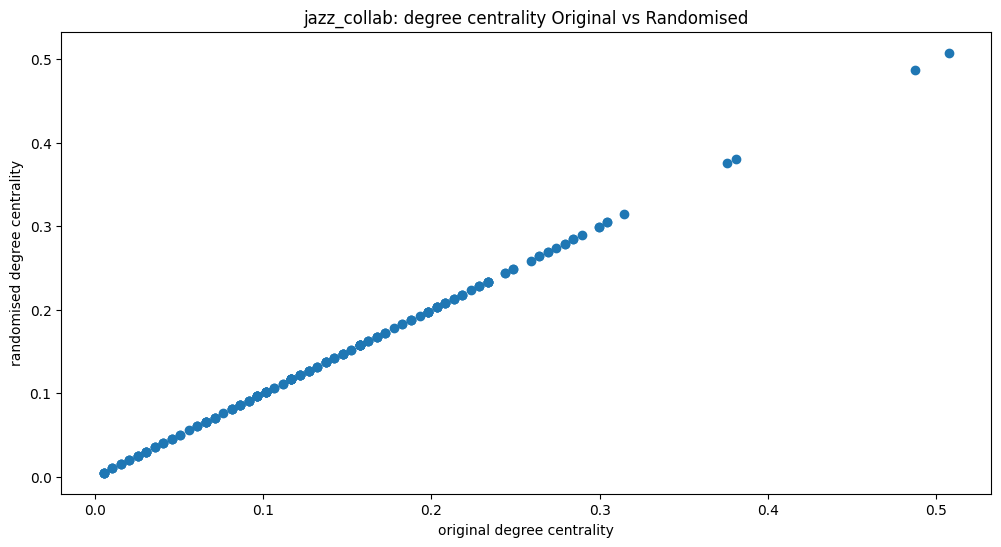

Pearson's correlation: 1.0
Kendall's tau: 1.0
Spearman's rho: 1.0


In [38]:
plot_Centralities_ori_vs_rnd_of_graph_G(degree,degree_rnd,"degree",'jazz_collab')

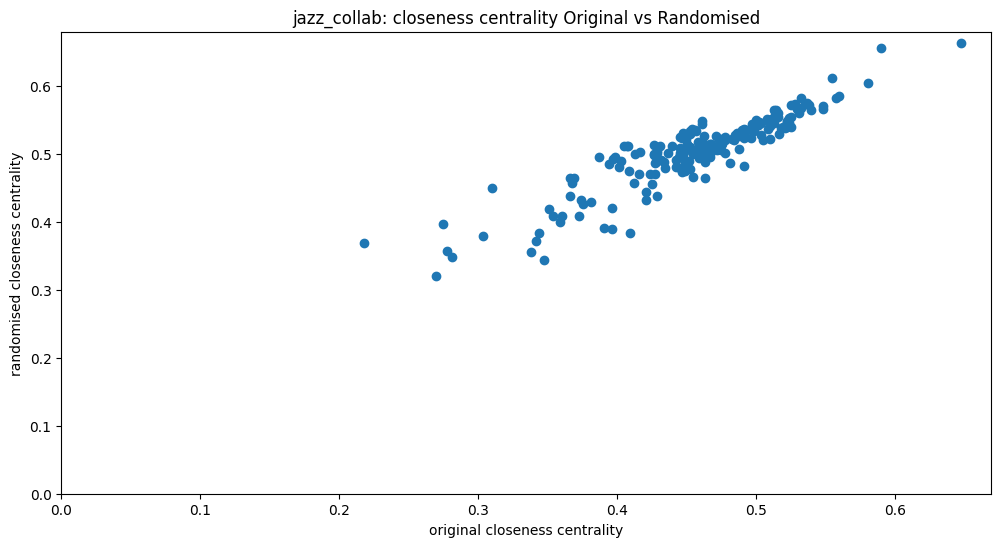

Pearson's correlation: 0.9074018878988753
Kendall's tau: 0.7345130415849731
Spearman's rho: 0.8909214891027072


In [39]:
plot_Centralities_ori_vs_rnd_of_graph_G(closeness,closeness_rnd,"closeness",'jazz_collab')

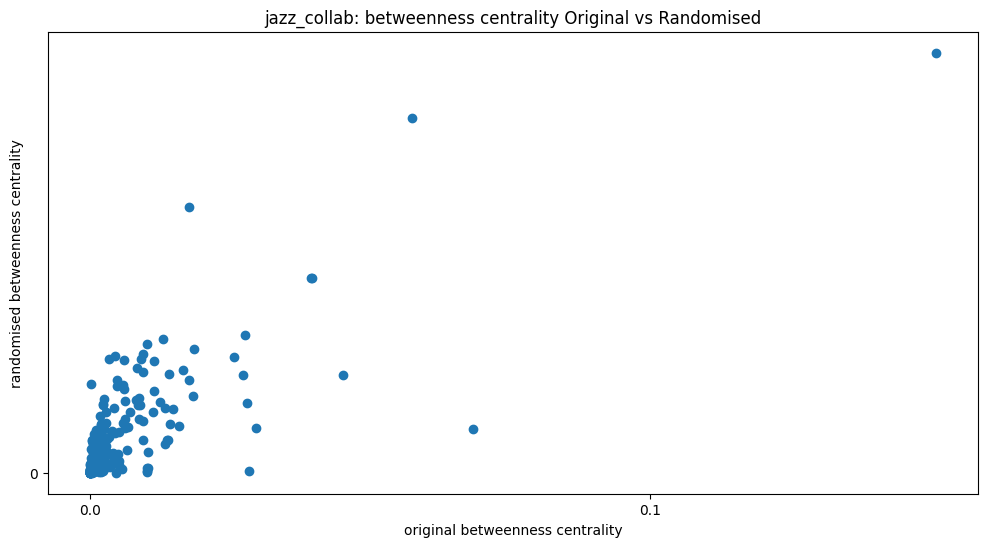

Pearson's correlation: 0.7490760502560846
Kendall's tau: 0.5202671948046168
Spearman's rho: 0.6915634887881572


In [40]:
plot_Centralities_ori_vs_rnd_of_graph_G(betweenness,betweenness_rnd,"betweenness",'jazz_collab')

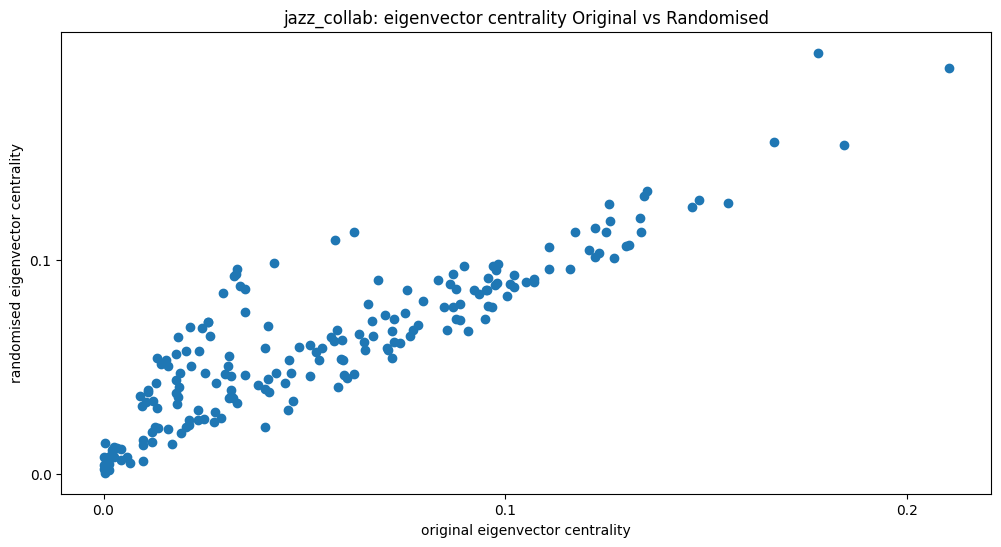

Pearson's correlation: 0.8959694917832881
Kendall's tau: 0.7290443462140348
Spearman's rho: 0.8833044561136543


In [41]:
plot_Centralities_ori_vs_rnd_of_graph_G(eigenvector,eigenvector_rnd,"eigenvector",'jazz_collab')

#### 2) terrorists

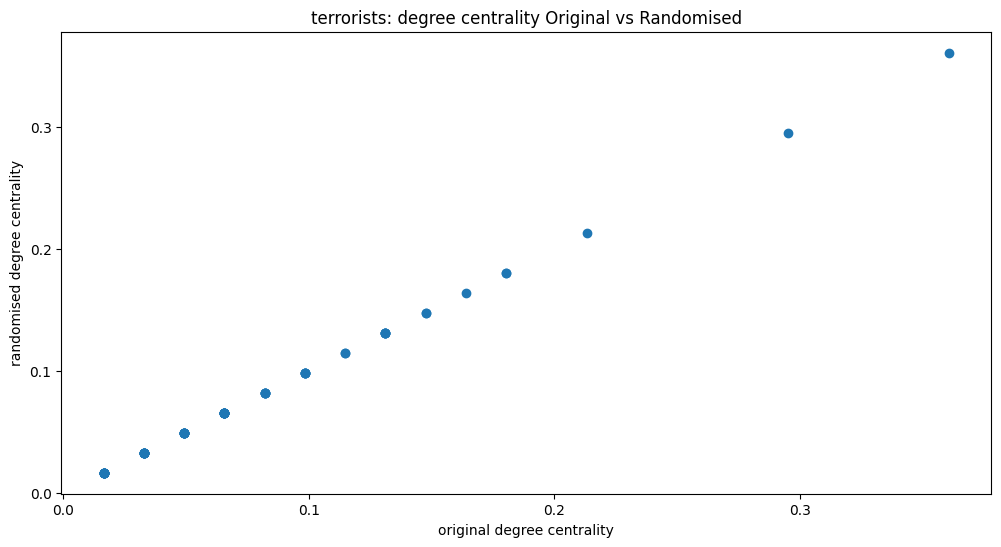

Pearson's correlation: 1.0
Kendall's tau: 1.0
Spearman's rho: 1.0


In [42]:
plot_Centralities_ori_vs_rnd_of_graph_G(degree,degree_rnd,"degree",'terrorists')

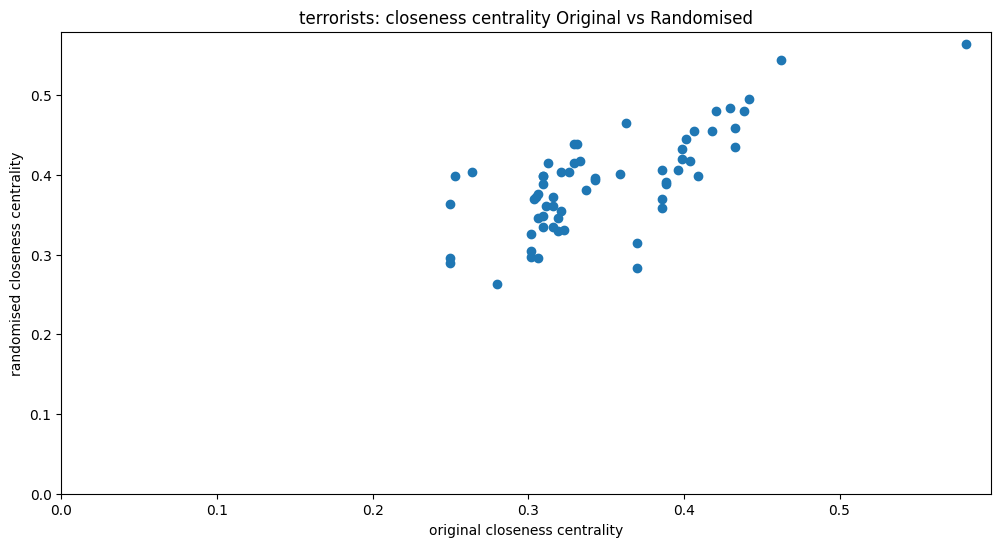

Pearson's correlation: 0.7396071924952161
Kendall's tau: 0.5543356583021686
Spearman's rho: 0.7115329121113888


In [43]:
plot_Centralities_ori_vs_rnd_of_graph_G(closeness,closeness_rnd,"closeness",'terrorists')

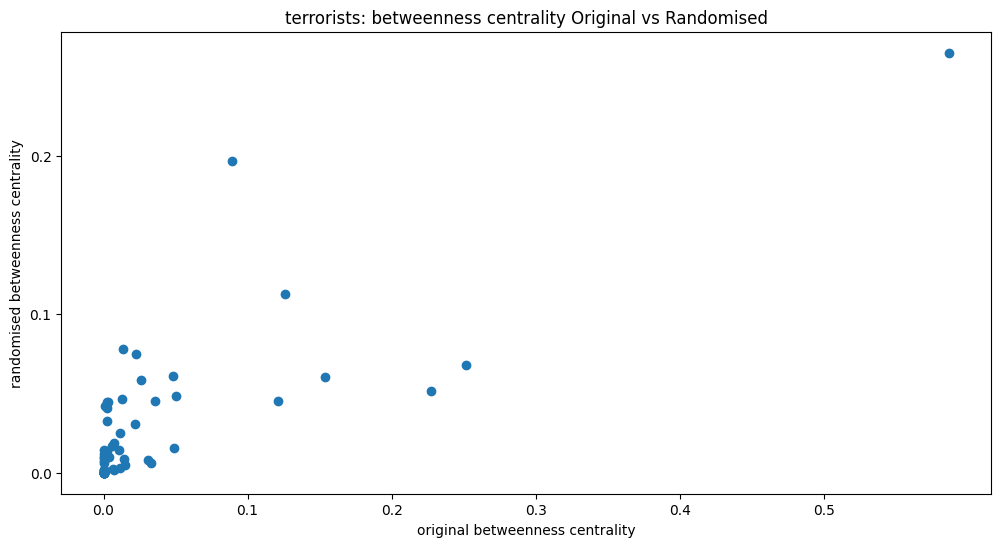

Pearson's correlation: 0.7845581097709234
Kendall's tau: 0.6264415594755796
Spearman's rho: 0.7958535195906352


In [44]:
plot_Centralities_ori_vs_rnd_of_graph_G(betweenness,betweenness_rnd,"betweenness",'terrorists')

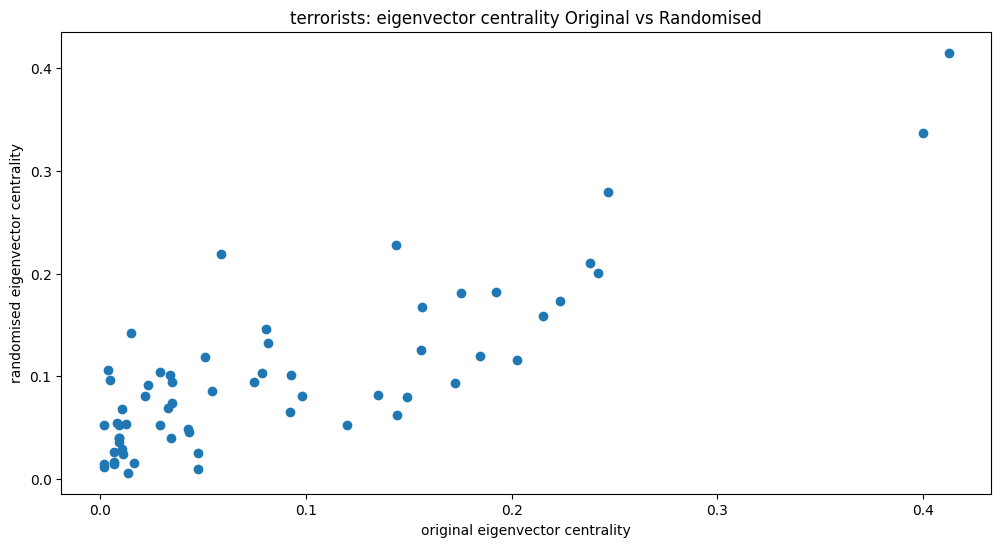

Pearson's correlation: 0.83625789430642
Kendall's tau: 0.5346077278224922
Spearman's rho: 0.7141382027740741


In [45]:
plot_Centralities_ori_vs_rnd_of_graph_G(eigenvector,eigenvector_rnd,"eigenvector",'terrorists')

#### 3) polblog

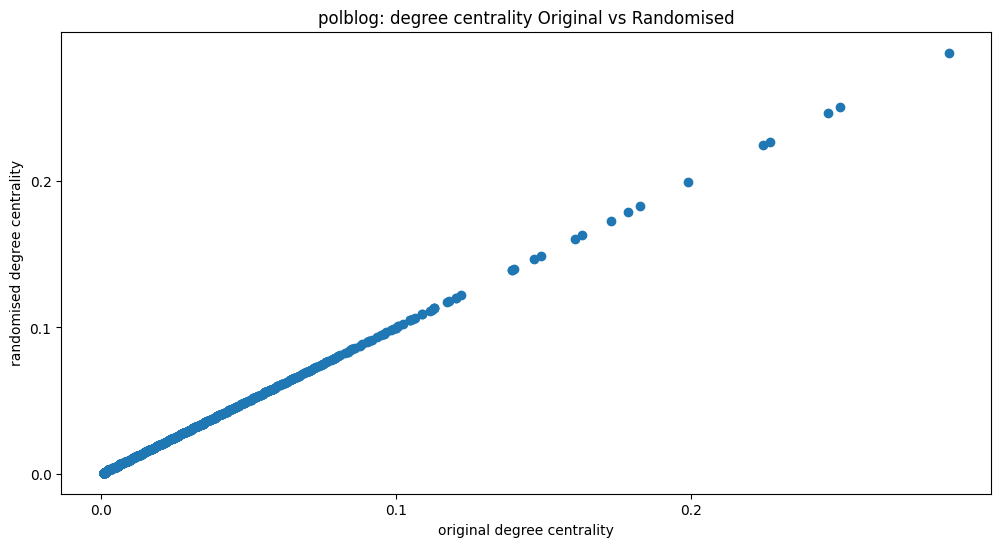

Pearson's correlation: 0.9999999999999959
Kendall's tau: 1.0
Spearman's rho: 1.0


In [46]:
plot_Centralities_ori_vs_rnd_of_graph_G(degree,degree_rnd,"degree",'polblog')

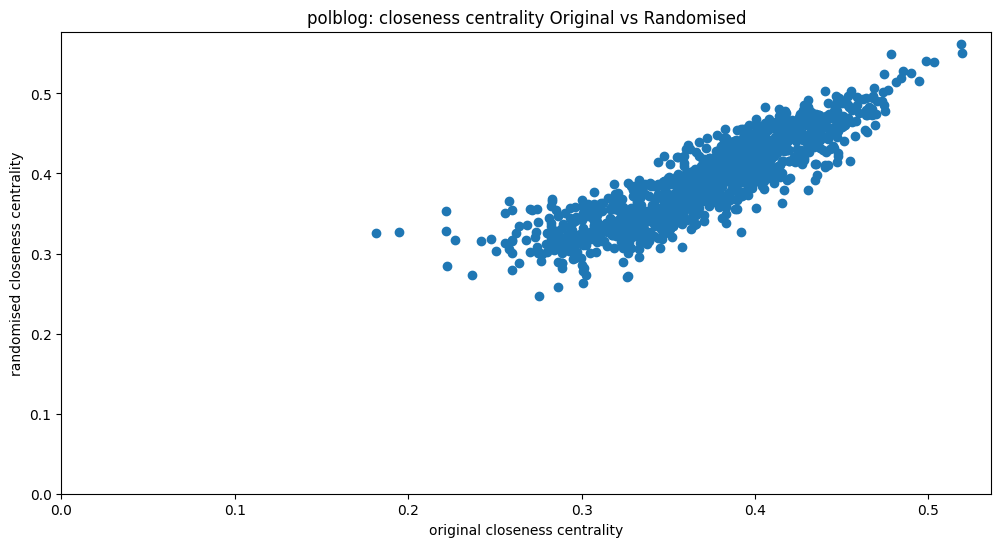

Pearson's correlation: 0.8821670208286874
Kendall's tau: 0.7180956807696101
Spearman's rho: 0.8994963041510404


In [47]:
plot_Centralities_ori_vs_rnd_of_graph_G(closeness,closeness_rnd,"closeness",'polblog')

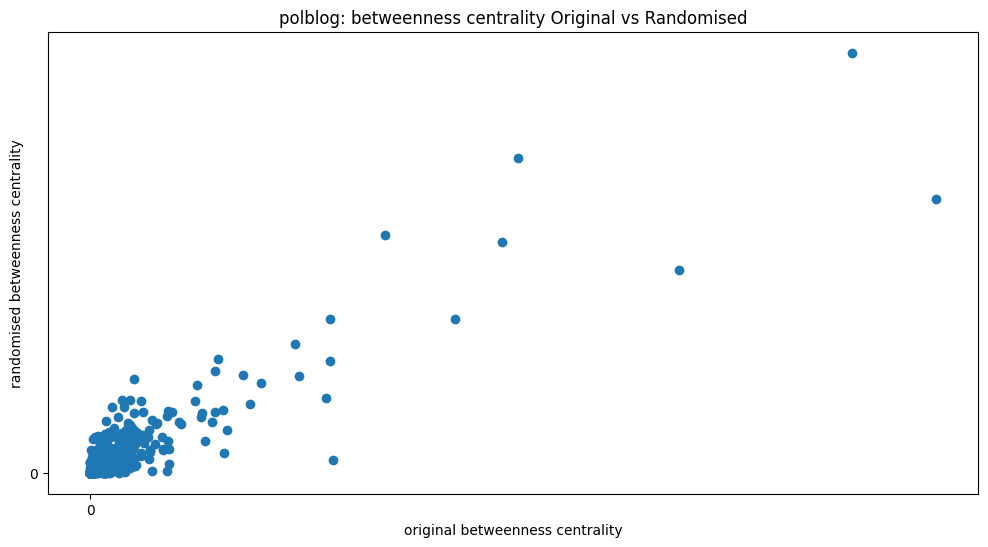

Pearson's correlation: 0.9015039666218984
Kendall's tau: 0.7201191705571844
Spearman's rho: 0.8832037852796492


In [48]:
plot_Centralities_ori_vs_rnd_of_graph_G(betweenness,betweenness_rnd,"betweenness",'polblog')

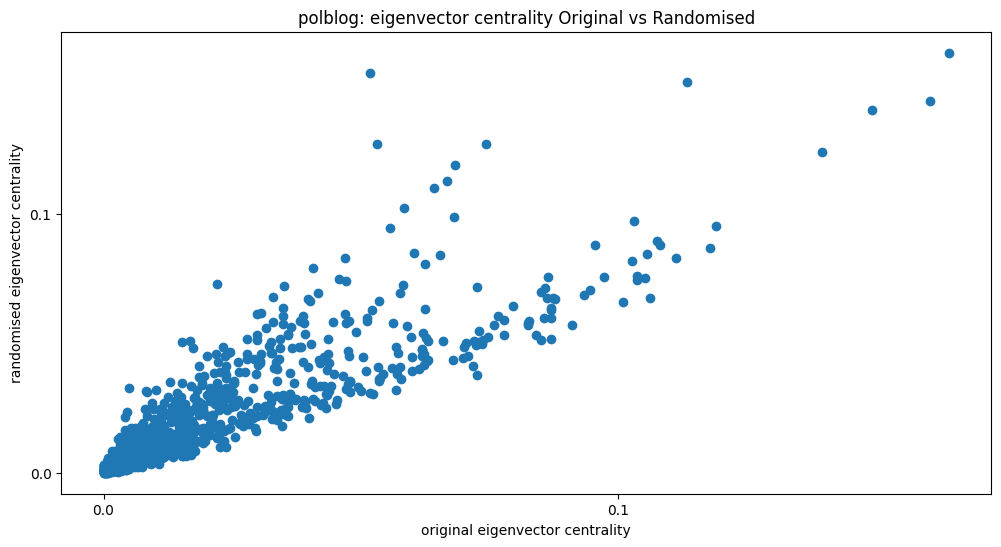

Pearson's correlation: 0.8898247195045145
Kendall's tau: 0.7773386320953992
Spearman's rho: 0.9389290687001626


In [49]:
plot_Centralities_ori_vs_rnd_of_graph_G(eigenvector,eigenvector_rnd,"eigenvector",'polblog')

+ Why do you get that result for degree centrality?

Network randomisation preserves the nodes' degree.\
Degree centrality does not change before and after randomisation, which means it stem from the degree distribution.\
Closeness centrality depends on all distance from one node from all other nodes, betweenness centrality measures control of information flow and it is a global property, eigenvector centrality measures node centrality by if it connects to other important nodes. These three kinds of centrality are all global properties, after randomisation the connected path has changed, so closeness, betweenness, and eigenvector centrality would also change.

# A03.3 Page Rank
In the dataset “Florida_foodweb.graphml” each node is a
species, and a directed link exists between 𝑖 and 𝑗 if 𝑖 feeds from 𝑗
                        
Task: Rank the nodes’ importance by means of the
PageRank algortihm.


+ Use different values of 𝛼, e.g.
𝛼 = 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 0.99
+ Compute Spearman’s rank correlation 𝜌 between the
PageRanks for 𝛼0 = 0.85 and all other 𝛼s, then plot them as a
scatter plot with 𝛼 on the x-axis and 𝜌(𝛼) on the y-axis.

In [50]:
foodweb = nx.read_graphml('data-assignment3/Florida_foodweb.graphml')

In [51]:
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 0.99]

In [52]:
def spearman_rho_pagerank(alpha, alpha0 = 0.85):
    pr0 = nx.pagerank(foodweb, alpha0)
    x = list(pr0.values())
    sm = {}
    for i in range(len(alpha)):
        pr = nx.pagerank(foodweb, alpha[i])
        y = list(pr.values())
        spearman = sp.spearmanr(x, y)[0]
        sm[alpha[i]] = spearman
    return sm

In [53]:
rho = spearman_rho_pagerank(alpha, alpha0 = 0.85)
print(rho)

{0.1: 0.90985771833617, 0.2: 0.932268656203263, 0.3: 0.9523875012176746, 0.4: 0.9695380859878635, 0.5: 0.9791706062012573, 0.6: 0.9869293405075842, 0.7: 0.9942411167076379, 0.8: 0.9993754046976445, 0.85: 1.0, 0.9: 0.9993868651619079, 0.95: 0.9972781397374408, 0.99: 0.9955533398657982}


Text(0.5, 1.0, "Spearman's rank correlation between PageRanks α_0 = 0.85 and other α")

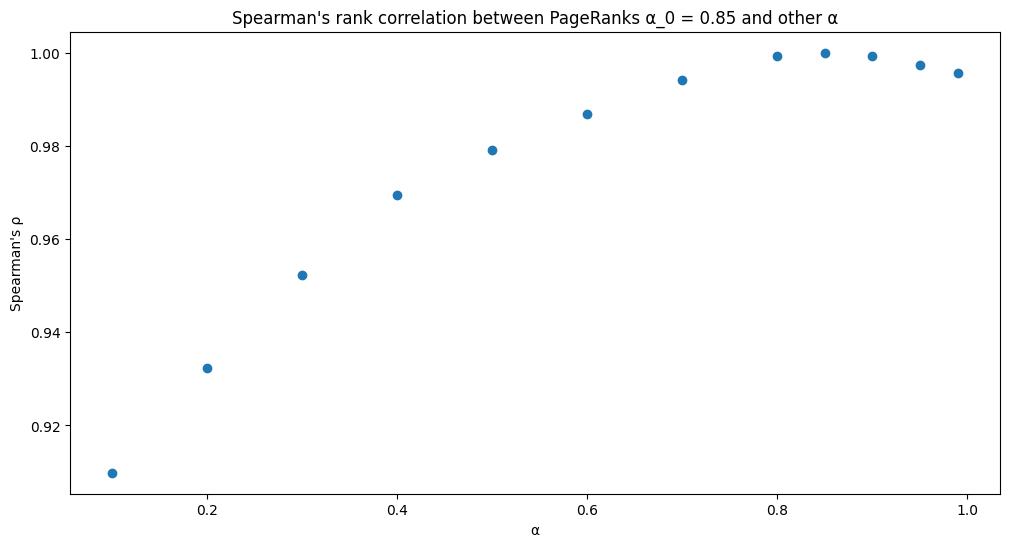

In [54]:
x = list(rho.keys())
y = list(rho.values())
plt.scatter(x,y)
plt.xlabel("\u03B1")
plt.ylabel("Spearman's \u03C1")
plt.title("Spearman's rank correlation between PageRanks \u03B1_0 = 0.85 and other \u03B1")